## 1. Derivada de sinais 1D

Vamos primeiro definir uma função f(x)=x**2, chamada fx

Text(0, 0.5, '$f(x)=x^2$')

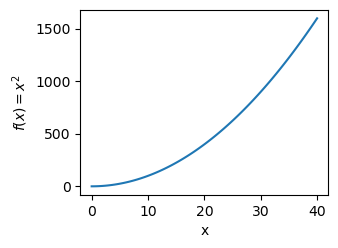

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 40, 100)
fx = x**2
plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('$f(x)=x^2$')

#### Cálculo da derivada de fx:

Text(0, 0.5, '$\\Delta f/\\Delta x\\approx 2x$')

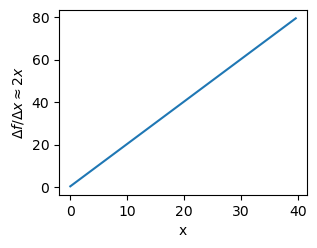

In [4]:
dx = x[1]-x[0]
dfx = np.zeros(len(fx)-1)
for i in range(len(fx)-1):
    dfx[i] = (fx[i+1] - fx[i])/dx
plt.plot(x[:-1], dfx)
plt.xlabel('x')
plt.ylabel(r'$\Delta f/\Delta x\approx 2x$')

In [5]:
# Ao invés do loop for, podemos calcular a derivada fazendo
dfx = (fx[1:] - fx[:-1])/dx
# Ou então utilizar a função diff do numpy
dfx = np.diff(fx)/dx

#### Derivada da função seno

Text(0.5, 1.0, 'Derivada')

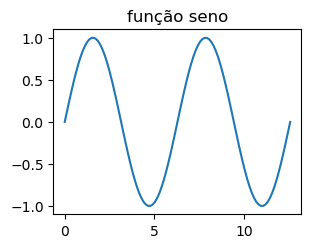

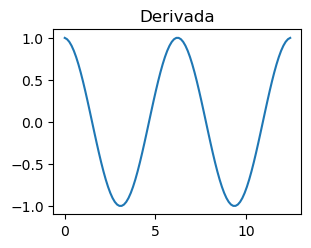

In [6]:
x = np.linspace(0, 4*np.pi, 101)
dx = x[1]-x[0]
fx = np.sin(x)
dfx = np.diff(fx)/dx
plt.plot(x, fx)
plt.title('função seno')
plt.figure()
plt.plot(x[:-1], dfx)
plt.title('Derivada')

#### Cálculo da derivada de uma função mais complicada:

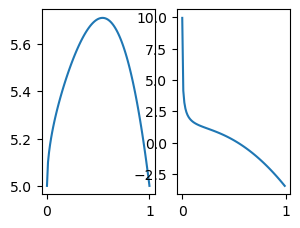

In [7]:
x = np.linspace(0, 1, 100)
fx_complex = 5 + x**2 + np.sqrt(x) - 2*x**3
dx = x[1]-x[0]
dfx_complex = np.diff(fx_complex)/dx
plt.subplot(1, 2, 1)
plt.plot(x, fx_complex)
plt.subplot(1, 2, 2)
plt.plot(x[:-1], dfx_complex)

## 2. Derivada de imagens

### A. Calculando diretamentere as diferenças entre pixels adjacentes

Text(0.5, 1.0, 'Derivada em y')

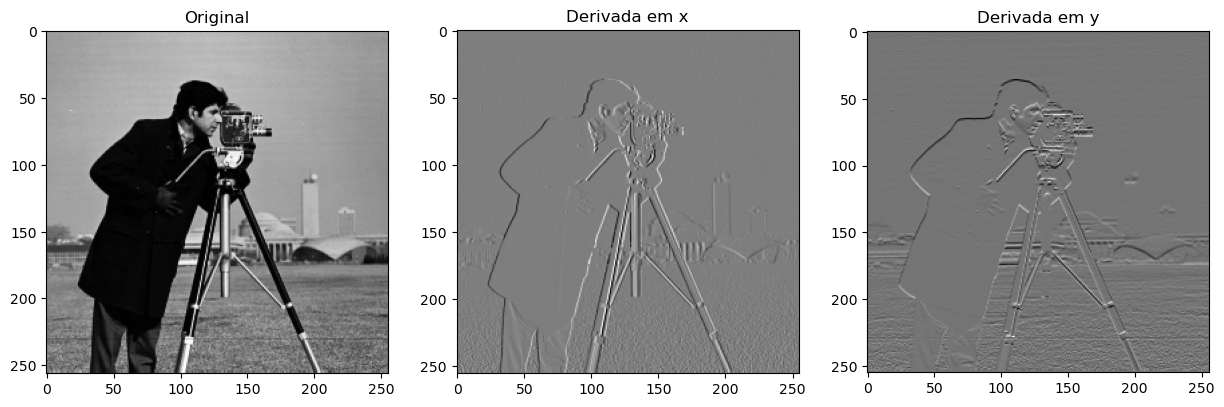

In [8]:
img = plt.imread('cameraman.tiff')
img = img.astype(int)               # Converte imagem de uint (unsigned int) para int (signed int), pois
                                    # a derivada pode ser negativa
num_rows, num_cols = img.shape

# Derivada na direção x, a imagem resultante possui uma coluna a menos que a original
img_dx = np.zeros((num_rows, num_cols-1))    
for row in range(num_rows):
    for col in range(num_cols-1):
        img_dx[row, col] = img[row,col+1] - img[row,col]
# O loop aninhado acima poderia ser substituído por
# img_dx = img[:,1:] - img[:,:-1]
# ou por
# img_dx = np.diff(img, axis=1)

# Derivada na direção y, a imagem resultante possui uma linha a menos que a original
img_dy = np.zeros((num_rows-1, num_cols))
for col in range(num_cols):
    for row in range(num_rows-1):
        img_dy[row, col] = img[row+1,col] - img[row,col]
# O loop aninhado acima poderia ser substituído por
# img_dy = img[1:] - img[:-1]
# ou por
# img_dy = np.diff(img, axis=0)
        
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx, 'gray')
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.imshow(img_dy, 'gray')
plt.title('Derivada em y')

Note que a derivada possui tantos valores negativos quantos positivos. Portanto, na visualização acima o valor mais negativo da imagem é mapeado para a cor preta, e o valor mais positivo para a cor branca. Com isso, pixels possuindo derivada zero (regiões uniformes da imagem, como o céu) são mapeados para uma cor intermediária, o cinza. 

#### Histograma das imagens:

Text(0.5, 1.0, 'Derivada em y')

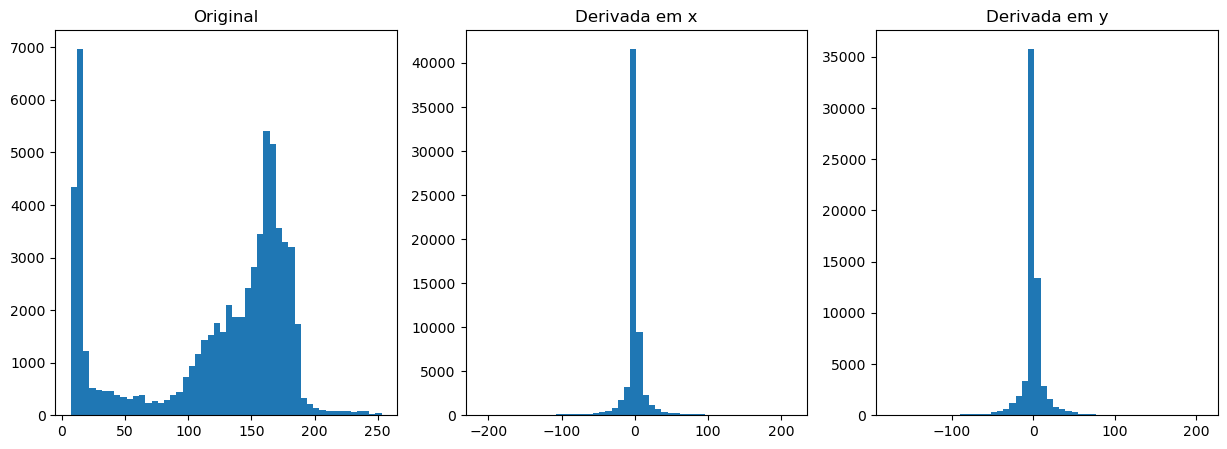

In [9]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.hist(img.flatten(), 50)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.hist(img_dx.flatten(), 50)
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.hist(img_dy.flatten(), 50)
plt.title('Derivada em y')

#### Magnitude do gradiente

Text(0.5, 1.0, 'Magnitude do gradiente')

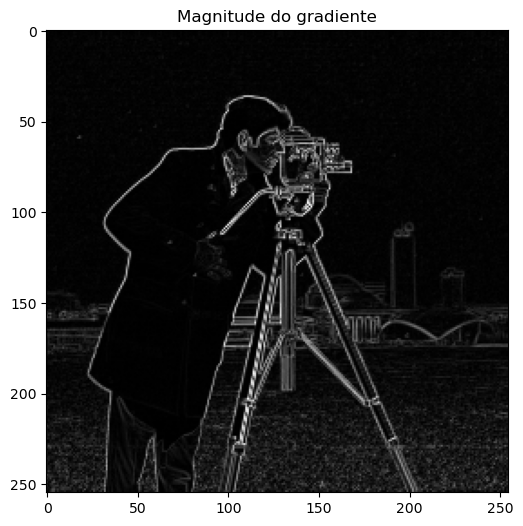

In [10]:
img_grad_mag = np.zeros((num_rows-1, num_cols-1))
for col in range(num_cols-1):
    for row in range(num_rows-1):
        img_grad_mag[row, col] = np.sqrt(img_dx[row,col]**2+img_dy[row, col]**2)
# Utilizando o numpy, o loop aninhado acima pode ser substituído por
#img_grad_mag = np.sqrt(img_dx[:-1]**2+img_dy[:, :-1]**2)
# Os índices :-1 acima são necessários porque os arrays possuem tamanhos diferentes
plt.figure(figsize=[6,6])
plt.imshow(img_grad_mag, 'gray')
plt.title('Magnitude do gradiente')

### B. Derivada utilizando convolução e o filtro derivada simples

Text(0.5, 1.0, 'Derivada em y')

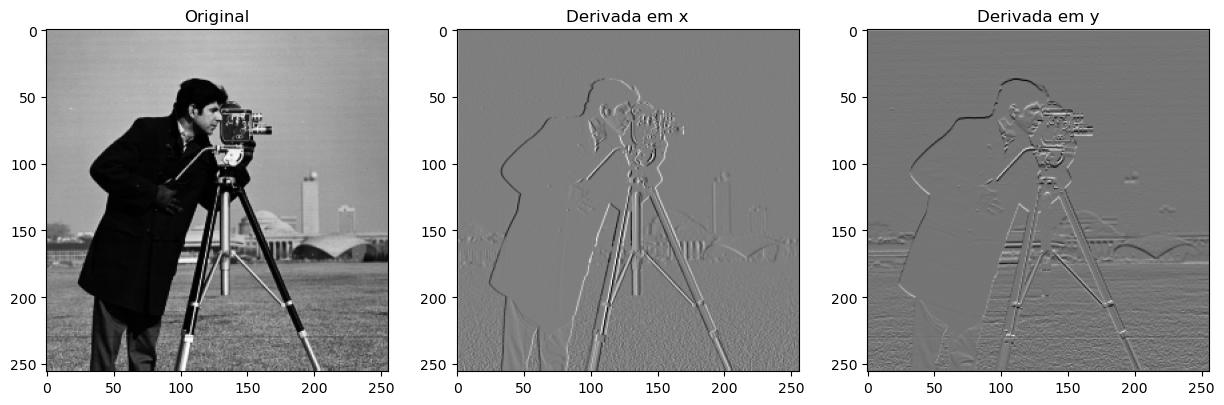

In [11]:
from scipy.signal import convolve

# Filtros derivada
wx = np.array([[1, -1]])
wy = np.array([[1],
               [-1]])
img_dx_conv = convolve(img, wx, mode='same')
img_dy_conv = convolve(img, wy, mode='same')

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx_conv, 'gray')
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.imshow(img_dy_conv, 'gray')
plt.title('Derivada em y')

### C. Derivada utilizando convolução com o filtro de Sobel

Text(0.5, 1.0, 'Derivada em y')

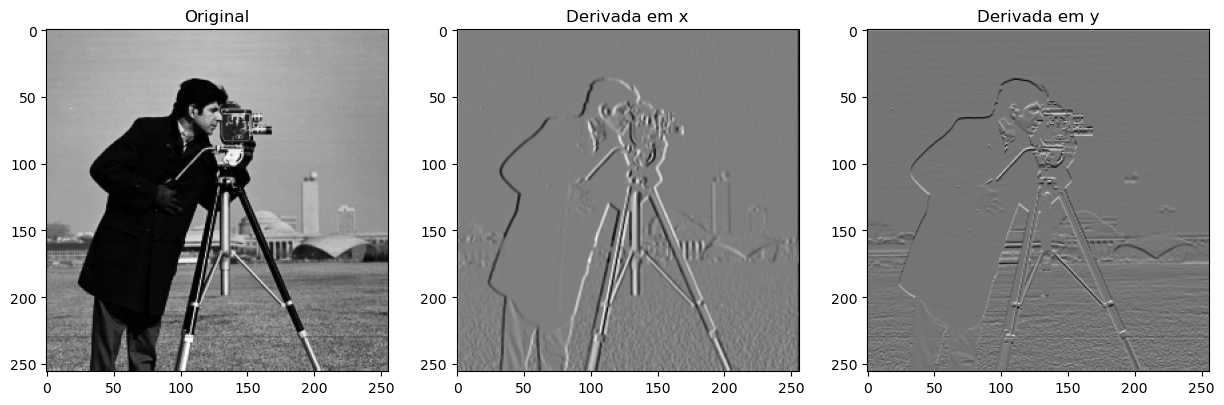

In [12]:
# Filtros derivada
sx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])
sy = wx.transpose()

img_dx_conv_sobel = convolve(img, sx, mode='same')
img_dy_conv_sobel = convolve(img, sy, mode='same')

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx_conv_sobel, 'gray')
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.imshow(img_dy_conv_sobel, 'gray')
plt.title('Derivada em y')

#### Comparação da magnitude do gradiente entre derivada simples e filtro Sobel

Text(0.5, 1.0, 'Derivada Sobel')

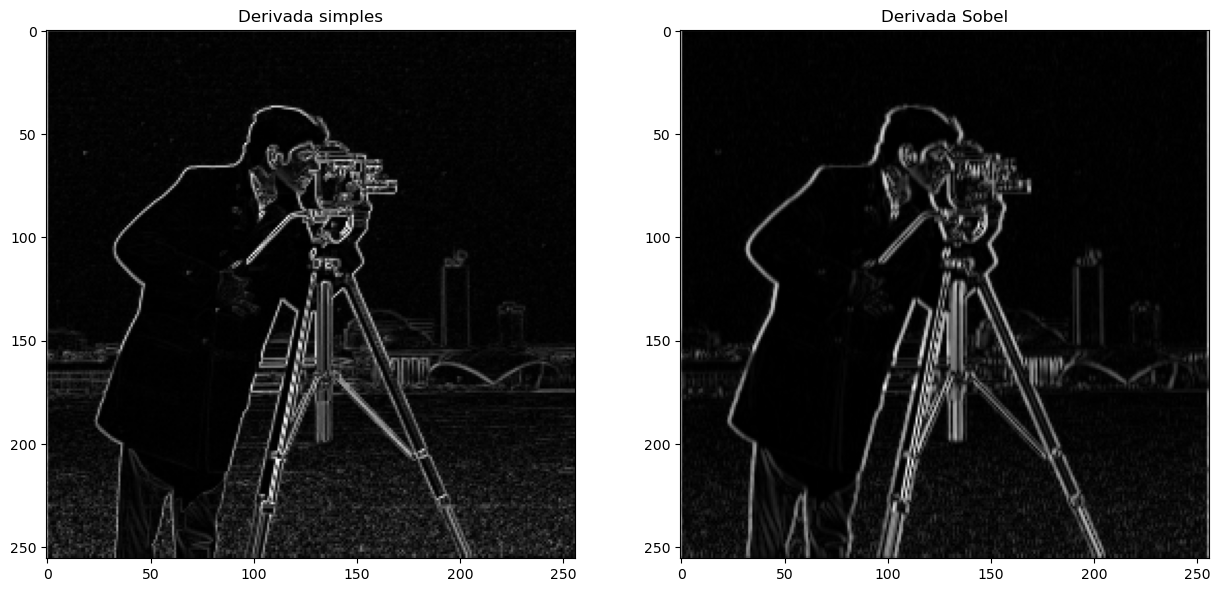

In [13]:
img_grad_mag = np.sqrt(img_dx_conv**2+img_dy_conv**2)
img_grad_mag_sobel = np.sqrt(img_dx_conv_sobel**2+img_dy_conv_sobel**2)
plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
plt.imshow(img_grad_mag, 'gray')
plt.title('Derivada simples')
plt.subplot(1, 2, 2)
plt.imshow(img_grad_mag_sobel, 'gray')
plt.title('Derivada Sobel')


#### Visualização do gradiente em uma dada região da imagem

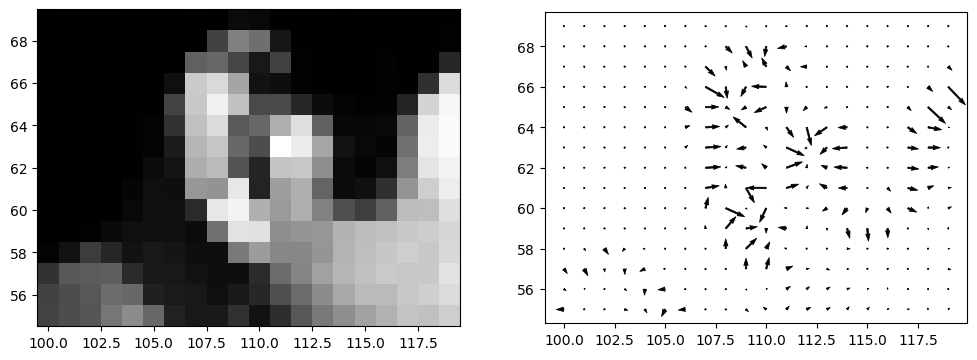

In [14]:
def view_gradient(img, img_dx, img_dy, region):
    
    Y, X = np.mgrid[region[0]:region[1], region[2]:region[3]]
    Y = Y[::-1]
    img_region = img[region[0]:region[1], region[2]:region[3]]
    img_dx_region = img_dx[region[0]:region[1], region[2]:region[3]]
    img_dy_region = img_dy[region[0]:region[1], region[2]:region[3]]
    
    plt.figure(figsize=[12, 6])
    plt.subplot(1, 2, 1, aspect='equal')
    plt.pcolormesh(X, Y, img_region, cmap='gray', shading='auto')
    plt.subplot(1, 2, 2, aspect='equal')
    plt.quiver(X, Y, img_dx_region, -img_dy_region, edgecolor='k', facecolor='k', 
               linewidth=.5, scale=3e3)

region = [55,70,100,120]    # [first row, last row, first column, last column]
view_gradient(img, img_dx_conv, img_dy_conv, region)
